In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display

In [66]:
df = pd.read_csv('Data/bank/bank-full.csv', sep=';')
df.head()
cat_col = df.dtypes=='O'
df_enc = pd.get_dummies(df.loc[:, cat_col], prefix=df.columns[cat_col])
df_enc = df_enc.join(df.loc[:, np.logical_not(cat_col)])
df_enc = df_enc.drop('y_no', axis=1)

In [67]:
df_train, df_test = train_test_split(df_enc, test_size=0.1, random_state=42)


response = df_train['y_yes']
feature_matrix = df_train.loc[:, df_train.columns!='y_yes']

#rebalancing classes (y_yes=1 is the minority class)--------
ratio = df_train['y_yes'].sum()/df_train['y_yes'].size
print("Original training dataset has", df_train.index.size, "Observations. \n", "Among them", response.sum(), "are positive and", response.size-response.sum(), "are negative \n Performing dataset rebalancing by undersampling... \n\n" )
df_train_false = df_train.loc[response==0, :]
df_train_false_resampled = df_train_false.sample(frac=ratio)

df_train_true = df_train.loc[response==1,:]

df_train = pd.concat([df_train_true, df_train_false_resampled])
ratio = df_train['y_yes'].sum()/df_train['y_yes'].size

response = df_train['y_yes']
feature_matrix = df_train.loc[:, df_enc.columns!='y_yes']

print("Training Dataset rebalancing performed. Dataset has now", df_train.index.size, "Observations. \n", "Among them", response.sum(), "are positive and", response.size-response.sum(), "are negative \n\n" )

X_train = df_train.loc[:, df_train.columns!='y_yes']
X_test = df_test.loc[:, df_test.columns!='y_yes']
y_train = df_train['y_yes']
y_test = df_test['y_yes']



Original training dataset has 40689 Observations. 
 Among them 4735 are positive and 35954 are negative 
 Performing dataset rebalancing by undersampling... 


Training Dataset rebalancing performed. Dataset has now 8919 Observations. 
 Among them 4735 are positive and 4184 are negative 




Variance explayned by the first 20  components is : 0.8731883112666614 For data scaled with MinMax scaler
Variance explayned by the first 20  components is : 0.6614149906002117 For data scaled with std scaler


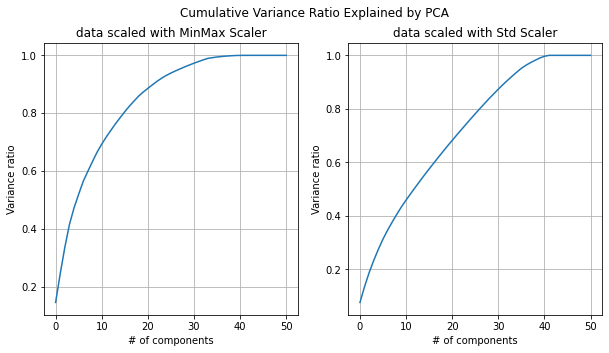

In [68]:
#Performing scaling and pca using min max scaler
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train)

X_train_scaled_mm = scaler_mm.transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

pca_mm = PCA()
pca_mm.fit(X_train_scaled_mm)
var_mm = pca_mm.explained_variance_ratio_

#performing scaling and pca using std scaler
scaler_std = StandardScaler()
scaler_std.fit(X_train)

X_train_scaled_std = scaler_std.transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

pca_std = PCA()
pca_std.fit(X_train_scaled_std)
var_std = pca_std.explained_variance_ratio_



#plotting cumulative variance comparing the two scalers
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
fig.suptitle('Cumulative Variance Ratio Explained by PCA')
axs[0].plot(var_mm.cumsum())
axs[0].grid(True)
axs[0].set_ylabel('Variance ratio')
axs[0].set_xlabel('# of components')
axs[0].set_title('data scaled with MinMax Scaler')
axs[1].plot(var_std.cumsum())
axs[1].grid(True)
axs[1].set_ylabel('Variance ratio')
axs[1].set_xlabel('# of components')
axs[1].set_title('data scaled with Std Scaler')

#scegliamo di prendere le prime 20 componenti
n_components=20
print("Variance explayned by the first", n_components, " components is :", var_mm.cumsum()[n_components-1], "For data scaled with MinMax scaler")
print("Variance explayned by the first", n_components, " components is :", var_std.cumsum()[n_components-1], "For data scaled with std scaler")

X_train_scaled_mm_pca = pca_mm.transform(X_train_scaled_mm)[:, :n_components]
X_test_scaled_mm_pca = pca_mm.transform(X_test_scaled_mm)[:, :n_components]

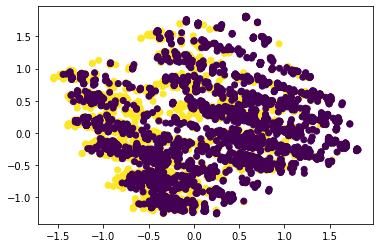

In [69]:
plt.scatter(X_train_scaled_mm_pca[:,0],X_train_scaled_mm_pca[:,1], c=y_train)

In [70]:
clf = SVC()
clf.fit(X_train_scaled_mm, y_train)
score_svc = clf.score(X_test_scaled_mm, y_test)
confusion_matrix(y_test, clf.predict(X_test_scaled_mm))


array([[3275,  693],
       [  85,  469]], dtype=int64)

In [71]:
clf = RandomForestClassifier(verbose = 1, n_jobs=10)
clf.fit(X_train_scaled_mm, y_train)
score_rfc = clf.score(X_test_scaled_mm, y_test)
confusion_matrix(y_test, clf.predict(X_test_scaled_mm))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3218,  750],
       [  64,  490]], dtype=int64)

In [86]:
X_test = X_test_scaled_mm
X_train = X_train_scaled_mm

clf = LogisticRegression()
clf.fit(X_train, y_train)
score_logreg = clf.score(X_test, y_test)
confusion_matrix(y_test, clf.predict(X_test))

#clf.predict_proba(X_test)
#plt.plot(clf.predict_proba(X_test))

c:\Users\giuli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3287,  681],
       [  91,  463]], dtype=int64)

In [55]:
y_test.sum()

554